In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


In [2]:
# Path of the file to read
caminho_arquivo = "./aquiraz.xlsx"

# Read the file into a variable fifa_data
dados = pd.read_excel(caminho_arquivo, sheet_name='Sheet1')

In [3]:
dados.tail()

,AREA_PRIV,OFER_TRANS,Idade,DATA,UNI_PADRAO,PREC_UNIT
2977,84.38,2,1,236,4,1777.67
2978,81.50,2,1,236,4,1619.63
2979,83.57,1,1,236,4,1842.77
2980,83.00,2,1,212,4,1746.99
2981,71.22,2,1,236,4,1965.74


<h2>Gráficos</h2>


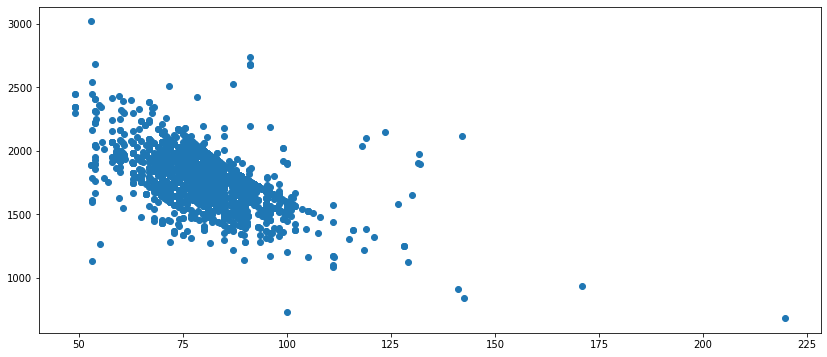

In [4]:
plt.figure(figsize=(14,6))
plt.scatter(dados['AREA_PRIV'],dados['PREC_UNIT'])


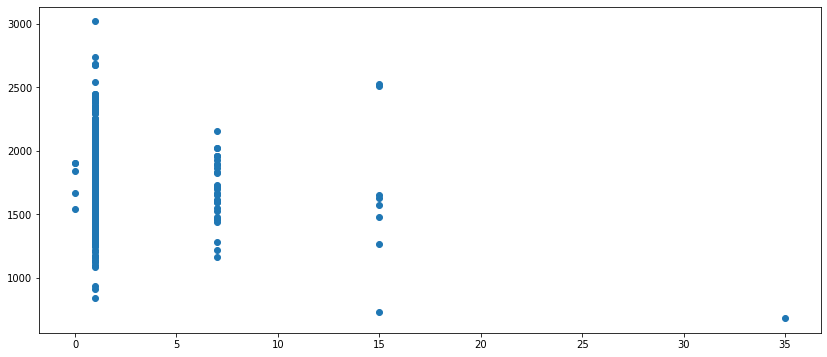

In [5]:
plt.figure(figsize=(14,6))
plt.scatter(dados['Idade'],dados['PREC_UNIT'])

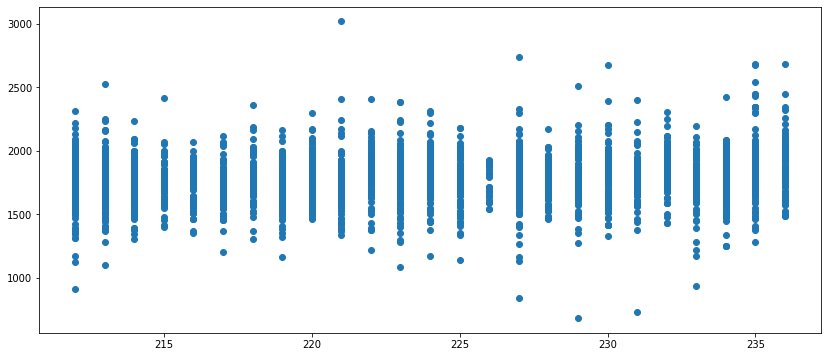

In [6]:
plt.figure(figsize=(14,6))
plt.scatter(dados['DATA'],dados['PREC_UNIT'])

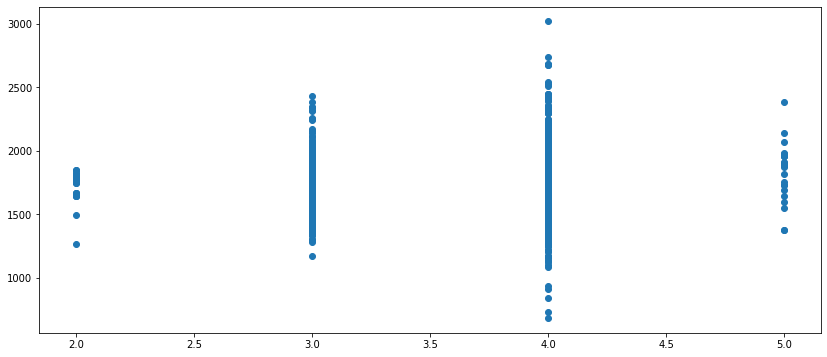

In [7]:
plt.figure(figsize=(14,6))
plt.scatter(dados['UNI_PADRAO'],dados['PREC_UNIT'])

In [8]:
dados.tail()


,AREA_PRIV,OFER_TRANS,Idade,DATA,UNI_PADRAO,PREC_UNIT
2977,84.38,2,1,236,4,1777.67
2978,81.50,2,1,236,4,1619.63
2979,83.57,1,1,236,4,1842.77
2980,83.00,2,1,212,4,1746.99
2981,71.22,2,1,236,4,1965.74


In [9]:
variaveis=['AREA_PRIV','OFER_TRANS','Idade','DATA','UNI_PADRAO']

In [10]:
X = dados[variaveis]

In [11]:
y=dados.PREC_UNIT

<h2>Previsão por Árvore de Decisão </h2>

In [12]:
from sklearn.tree import DecisionTreeRegressor

# Define model. Specify a number for random_state to ensure same results each run
melbourne_model = DecisionTreeRegressor(random_state=1)

# Fit model
melbourne_model.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1, splitter='best')

In [13]:
avaliando=[50.27,1,5,237,5]
avaliando=np.array(avaliando).reshape((1,-1))

print("Resultado da previsão pelo método Árvore de Decisão:")
print("Dados")
print(avaliando)
print(X.tail())
print("The predictions are")
print(melbourne_model.predict(X.tail()))
print(melbourne_model.predict(avaliando))
print(melbourne_model.predict(avaliando)*50.27)

Resultado da previsão pelo método Árvore de Decisão:
Dados
[[ 50.27   1.     5.   237.     5.  ]]
      AREA_PRIV  OFER_TRANS  Idade  DATA  UNI_PADRAO
2977      84.38           2      1   236           4
2978      81.50           2      1   236           4
2979      83.57           1      1   236           4
2980      83.00           2      1   212           4
2981      71.22           2      1   236           4
The predictions are
[1777.67       1619.63       1860.715      1773.76333333 2000.84      ]
[2443.49]
[122834.2423]


<h2>Erro absoluto médio </h2>

In [14]:
from sklearn.metrics import mean_absolute_error

predicted_home_prices = melbourne_model.predict(X)
mean_absolute_error(y, predicted_home_prices)
from sklearn.model_selection import train_test_split

# split data into training and validation data, for both features and target
# The split is based on a random number generator. Supplying a numeric value to
# the random_state argument guarantees we get the same split every time we
# run this script.
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)
# Define model
melbourne_model = DecisionTreeRegressor()
# Fit model
melbourne_model.fit(train_X, train_y)

# get predicted prices on validation data
val_predictions = melbourne_model.predict(val_X)
print(mean_absolute_error(val_y, val_predictions))

116.84527984846551


In [15]:
from sklearn.model_selection import train_test_split

# split data into training and validation data, for both features and target
# The split is based on a random number generator. Supplying a numeric value to
# the random_state argument guarantees we get the same split every time we
# run this script.
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)
# Define model
melbourne_model = DecisionTreeRegressor()
# Fit model
melbourne_model.fit(train_X, train_y)

# get predicted prices on validation data
val_predictions = melbourne_model.predict(val_X)
print(mean_absolute_error(val_y, val_predictions))

113.75913373586496


<h2>Testando vários modelos </h2>Na prática, não é incomum uma árvore ter 10 divisões entre o nível superior (todas as casas) e uma folha. À medida que a árvore se aprofunda, o conjunto de dados é cortado em folhas com menos casas. Se uma árvore tiver apenas 1 divisão, ela divide os dados em 2 grupos. Se cada grupo for dividido novamente, teríamos 4 grupos de casas. Dividir cada um deles novamente criaria 8 grupos. Se continuarmos dobrando o número de grupos, adicionando mais divisões em cada nível, teremos 210210 grupos de casas quando chegarmos ao 10º nível. São 1024 folhas. Quando dividimos as casas entre muitas folhas, também temos menos casas em cada folha. As folhas com muito poucas casas farão previsões bastante próximas dos valores reais dessas casas, mas podem fazer previsões muito pouco confiáveis ​​para novos dados (porque cada previsão é baseada em apenas algumas casas). Esse é um fenômeno chamado de super adaptação, em que um modelo corresponde quase perfeitamente aos dados de treinamento, mas é ruim na validação e em outros novos dados. Por outro lado, se tornamos nossa árvore muito rasa, ela não divide as casas em grupos muito distintos. No extremo, se uma árvore divide as casas em apenas 2 ou 4, cada grupo ainda tem uma grande variedade de casas. As previsões resultantes podem estar distantes para a maioria das casas, mesmo nos dados de treinamento (e a validação também será ruim pela mesma razão). Quando um modelo falha em capturar distinções e padrões importantes nos dados, o desempenho é fraco, mesmo nos dados de treinamento, chamados de falta de ajuste. Como nos preocupamos com a precisão dos novos dados, estimados a partir de nossos dados de validação, queremos encontrar o ponto ideal entre a adequação e super adequação. 

In [16]:
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

In [17]:
# compare MAE with differing values of max_leaf_nodes
for max_leaf_nodes in [5, 50, 500, 5000]:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 5  		 Mean Absolute Error:  121
Max leaf nodes: 50  		 Mean Absolute Error:  116
Max leaf nodes: 500  		 Mean Absolute Error:  115
Max leaf nodes: 5000  		 Mean Absolute Error:  116


<h3>Conclusão</h3> Aqui está o que deve ser levado em consideração: os modelos podem sofrer: Sobreajuste: captura de padrões espúrios que não se repetirão no futuro, levando a previsões menos precisas, ou Sobreajuste: falha em capturar padrões relevantes, novamente levando a previsões menos precisas. Usamos dados de validação, que não são usados no treinamento do modelo, para medir a precisão de um modelo candidato. Isso nos permite experimentar vários modelos candidatos e manter o melhor.